#### 셀레니움
- 웹을 테스트 하기 위한 프레임워크
- 브라우저를 통해서 자동으로 일을 시켜볼 수 있음
- pip install selenium
- 사용하려는 브라우저를 조작하기 때문에 웹드라이버가 필요함
    - chrome : version 확인 ==> 버젼에 맞는 웹드라이버 다운로드
- 파싱 라이브러리를 사용하지 않아도 됨(셀레니움에서 제공하는 파싱 방법 사용)

In [2]:
from selenium import webdriver
import time

driver = webdriver.Chrome()

driver.get("https://www.naver.com")

time.sleep(2)
driver.quit()

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

def set_chrome_driver():
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument("--start-maximized")
    # chrome_options.add_argument("--headless")   # 브라우저 띄우지 않고 결과값 받기
    driver = webdriver.Chrome(
        service=Service(ChromeDriverManager().install()), options=chrome_options
    )
    return driver

Daum
https://www.daum.net/

<html lang="ko"><head>
  <meta charset="utf-8">
  <title>Daum</title>
  <meta http-equiv="x-ua-compatible" content="IE=edge">
  <meta property="og:url" content="https://www.daum.net/">
  <meta property="og:type" content="website">
  <meta property="og:title" content="Daum">
  <meta http-equiv="Pragma" content="no-cache">
  <meta http-equiv="Expires" content="-1">
  <meta name="referrer" content="origin">
  <meta property="og:image" content="https://i1.daumcdn.net/svc/image/U03/common_icon/5587C4E4012FCD0001">
  <meta property="og:description" content="이용자 선택권을 강화한 뉴스, 세상의 모든 정보를 연결하는 검색. Daum에서 나의 관심 콘텐츠를 즐겨보세요.">
  <meta name="description" content="이용자 선택권을 강화한 뉴스, 세상의 모든 정보를 연결하는 검색. Daum에서 나의 관심 콘텐츠를 즐겨보세요.">
  <meta name="msapplication-task" content="name=Daum;action-uri=//www.daum.net/;icon-uri=/favicon.ico">
  <meta name="msapplication-task" content="name=미디어다음;action-uri=//news.daum.net/;icon-uri=/media_favicon.ico">
  <meta name="msapplication-task" 
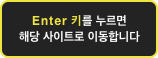

In [23]:
import time

driver = set_chrome_driver()
driver.get("https://www.daum.net")

print(driver.title)
print(driver.current_url)

print()
print(driver.page_source)   # 현재 페이지 소스 가져오기

time.sleep(2)
driver.quit()

In [8]:
from selenium.webdriver.common.by import By #파싱
from selenium.webdriver.common.keys import Keys # 키보드 키 지정

driver = set_chrome_driver()
driver.get("https://www.daum.net")

# 다음 검색어 창에 검색어를 입력한 후 엔터

#검색창 찾기(파싱) : find_
# driver.find_element(기준,"값")
# By.ID,
element = driver.find_element(By.NAME,"q")
# element

# 검색어 입력
element.send_keys("아이폰")
# 엔터
element.send_keys(Keys.ENTER)

# 뒤로가기
driver.back()

In [9]:
# 네이버 - 검색 창에 임의의 검색어 넣은 후 엔터

driver = set_chrome_driver()
driver.get("https://naver.com")

element = driver.find_element(By.ID,"query")

element.send_keys("장마")

element.send_keys(Keys.ENTER)

In [13]:
# 다나와

driver = set_chrome_driver()
driver.get("https://www.danawa.com/")
# 페이지가 로딩될 때까지 잠시 기다리기 : time.sleep(2), driver.implicitly_wait(2)
driver.implicitly_wait(2)

# 로그인 버튼 찾기 => 클릭
# <a href="https://auth.danawa.com/login?url=https%3A%2F%2Fwww.danawa.com%2F%3Fsrc%3Dadwords%26kw%3DGA0000020%26utm_source%3Dgoogle%26utm_medium%3Dcpc%26utm_campaign%3Dkeyword%26gad%3D1%26gclid%3DCjwKCAjw2K6lBhBXEiwA5RjtCSL7O_Ue12riajXssJFHL4njEsrw2bLgvLwUJmjK7nPot5YcMV0vyRoCxvoQAvD_BwE" role="button" class="btn_user btn_user--login">
# 		<span class="txt">로그인</span>	</a>
login_btn = driver.find_element(By.CLASS_NAME,"btn_user--login")
login_btn.send_keys(Keys.ENTER)
driver.implicitly_wait(2)

# 다나와 아이디 / 비밀번호
userid = driver.find_element(By.ID,"danawa-member-login-input-id")
userid.send_keys("wotla3009")

password = driver.find_element(By.ID,"danawa-member-login-input-pwd")
password.send_keys("wo3244852!")
password.send_keys(Keys.ENTER)


In [19]:
# 한국은행 경제통계 시스템

driver = set_chrome_driver()
driver.get("https://ecos.bok.or.kr/#/")

driver.implicitly_wait(2)
# 100 대 통계지표 요소 찾기
# div.main-left > div.main-icon-menu > ul > li:nth-child(1) > a
driver.find_element(By.CSS_SELECTOR,"div.main-left > div.main-icon-menu > ul > li:nth-child(1) > a").click()
driver.implicitly_wait(2)

# Excel로 다운로드
#root > div.wrap-body > div > div.statics_header > div > div.searchBox > div.exelDown.partition-right
excel_btn = driver.find_element(By.CSS_SELECTOR,"div.searchBox > div.exelDown.partition-right").click()

In [30]:
import time

driver = set_chrome_driver()
driver.get("https://www.youtube.com/")

# driver.implicitly_wait(2)
time.sleep(2)

# 검색 창 찾기
search = driver.find_element(By.NAME,"search_query")
#검색어 입력
search.send_keys("아이유")
search.send_keys(Keys.ENTER)

# driver.implicitly_wait(5)
time.sleep(3)

# title 출력
titles = driver.find_elements(By.CSS_SELECTOR,"#title-wrapper > h3")
for title in titles:
    print(title.text)

[FILM] IU Media Art Exhibition "Moment,"
[IU TV] Happy IU day💛 갓벽한 하루 Vlog🎂
아이유 노래 모음 BEST 50곡, (IU song collection 50 Playlist ) 보고듣는 소울뮤직TV
IU Best Songs Playlist (2023 updated) audio
[PLAYLIST] 아이유노래모음
K POP 아이유 노래모음 30곡 가사포함 ｜ IU Playlist 30 Songs Korean Lyrics
💿𝗙𝗨𝗟𝗟▸ 아이유 노래모음 | IU songs playlist
- [Playlist] IU (아이유) Best Songs 2023 - 아이유 최고의 노래모음 - IU 최고의 노래 컬렉션 - LILAC
[MV] IU(아이유) _ Blueming(블루밍)
[Playlist] 내가 좋아하는 잔잔한 아이유 노래 모음
IU (아이유) song playlist. (Happy, funny, and fight song to cafe, study, and fun moments)
💿𝗙𝗨𝗟𝗟▸ 아이유 노래모음 | IU songs playlist
{ * 힘내자~ } 아이유 노동요 69곡 모음 Exciting iU's songs playlist, 월요병 퇴치~ Feat.3일동안
[ PLAYLIST ] 아이유 노래모음
[IU] '내 손을 잡아(Hold My Hand)' Live Clip (2019 IU Tour Concert 'Love, poem')
아이유(IU)의 킬링보이스를 라이브로! - 하루 끝, 너의 의미, 스물셋, 밤편지, 팔레트, 가을 아침, 삐삐, Blueming, 에잇, Coin, 라일락 ㅣ 딩고뮤직
[MV] IU(아이유) _ Celebrity
『Playlist』 2021 아이유 IU 노래모음ㅣBest Songs of IU ㅣ🎯『광고제거가능』
[𝐏𝐥𝐚𝐲𝐥𝐢𝐬𝐭] 아이유 X 볼빨간사춘기 X 태연🌸💕
"나랑 하고 싶어요?" 초면에 돌직구 던진 유인나
머리도 하고 화장도 하고 일도 하고
IQ 200 "고양이

In [31]:
from bs4 import BeautifulSoup

driver = set_chrome_driver()
driver.get("https://www.youtube.com/")

time.sleep(2)

# 검색 창 찾기
search = driver.find_element(By.NAME,"search_query")
#검색어 입력
search.send_keys("아이유")
search.send_keys(Keys.ENTER)

time.sleep(3)

res = BeautifulSoup(driver.page_source)
titles = res.select("#title-wrapper > h3")
for title in titles:
    print(title.text)   #string, get_text(), text






아이유 노래 모음 BEST 50곡, (IU song collection 50 Playlist ) 보고듣는 소울뮤직TV







[FILM] IU Media Art Exhibition "Moment,"







[IU TV] Happy IU day💛 갓벽한 하루 Vlog🎂







[PLAYLIST] 아이유노래모음







IU Best Songs Playlist  (2023 updated) audio







- [Playlist] IU (아이유) Best Songs 2023 - 아이유 최고의 노래모음 - IU 최고의 노래 컬렉션 - LILAC







💿𝗙𝗨𝗟𝗟▸ 아이유 노래모음 | IU songs playlist







아이유(IU)의 킬링보이스를 라이브로! - 하루 끝, 너의 의미, 스물셋, 밤편지, 팔레트, 가을 아침, 삐삐, Blueming, 에잇, Coin, 라일락 ㅣ 딩고뮤직







[IU] '내 손을 잡아(Hold My Hand)' Live Clip (2019 IU Tour Concert 'Love, poem')







[MV] IU(아이유) _ Blueming(블루밍)







[ PLAYLIST ] 아이유 노래모음







서울 호우경보, 구로구 첫 '극한호우' 재난문자..수도권 대부분 지역 호우 특보 / 이 시각 주요지점 침수 호우 상황 - [끝까지LIVE] MBC뉴스 2023년 7월 11일







잠 잘때 듣기 좋은 아이유 노래 (7곡) | 타임라인 설명&고정댓글 | 다들 좋은 꿈꿔요







여행갈때, 운전할때 아니면 잘때도 듣기 좋은 아이유 노래 10시간!!! (canciones de IU - songs of IU)







[Playlist] 내가 좋아하는 잔잔한 아이유 노래 모음







[MV] IU(아이유) _ Celebrity







『Playlist』 2021 아이유 IU 노래모음ㅣBest Songs of IU ㅣ🎯『광고제거가능』







K PO

In [32]:
driver = set_chrome_driver()
driver.get("https://www.daum.net")

element = driver.find_element(By.NAME,"q")

# 검색어 입력
element.send_keys("아이폰")
# 엔터
element.send_keys(Keys.ENTER)

driver.save_screenshot("./iphone.png")
driver.get_screenshot_as_file("./iphone2.png")

True

In [44]:
# iframe
# switch_to.frame() : iframe 안에 있는 요소 찾기 위해서는 iframe 안으로 이동

url = "https://www.w3schools.com/tags/tryit.asp?filename=tryhtml_headers"
driver = set_chrome_driver()
driver.get(url)

driver.switch_to.frame("iframeResult")

element = driver.find_element(By.TAG_NAME,"h1")
print(element.text)

# iframe 밖으로 나오기
driver.switch_to.default_content()

# //*[@id="textareawrapper"]/div/div[6]/div[1]/div/div/div/div[5]/pre[5]/span/span[4]
element2 = driver.find_element(By.XPATH,"//*[@id='textareawrapper']/div/div[6]/div[1]/div/div/div/div[5]/pre[5]/span/span[4]")
print(element2.text)

This is heading 1
This is heading 1


In [40]:
#textareawrapper > div > div.CodeMirror-scroll > div.CodeMirror-sizer > div > div > div > div.CodeMirror-code > pre:nth-child(5) > span > span:nth-child(4)
url = "https://www.w3schools.com/tags/tryit.asp?filename=tryhtml5_input_type_radio"

driver = set_chrome_driver()
driver.get(url)

# 왼쪽 화면에서 h1 태그 안 내용 출력
element1 = driver.find_element(By.XPATH,"//*[@id='textareawrapper']/div/div[6]/div[1]/div/div/div/div[5]/pre[5]/span/span[4]")
print(element1.text)

# 오른쪽 화면에서 HTML 라디오 버튼 클릭
driver.switch_to.frame("iframeResult")

driver.find_element(By.ID,"html").click()

# iframe 밖으로 나오기
driver.switch_to.default_content()

Display Radio Buttons


In [8]:
from selenium.webdriver.common.by import By #파싱
from selenium.webdriver.common.keys import Keys # 키보드 키 지정
import time
# 새탭 열기와 같은 작업은 스크립트 실행 : execute_script(스크립트 코드 작성)

driver = set_chrome_driver()
driver.get("https://www.naver.com")

driver.execute_script("window.open('https://www.daum.net')")

# 브라우저 열린 탭 정보 가져오기
tabs = driver.window_handles

# print(tabs)

# naver : tabs[0], daum : tabs[1]
driver.switch_to.window(tabs[1])

element = driver.find_element(By.NAME,"q")
element.send_keys("아이폰")
# 엔터
element.send_keys(Keys.ENTER)

time.sleep(2)

# 네이버로 돌아오기
driver.switch_to.window(tabs[0])

In [19]:
# 네이버 쇼핑 /검색 마우스

driver = set_chrome_driver()
driver.get("https://shopping.naver.com/home")

# time.sleep(2)

element = driver.find_element(By.CLASS_NAME,"_searchInput_search_text_3CUDs")
element.send_keys("마우스")

# element.send_keys(Keys.ENTER)   # input 이여서 엔터가능
driver.find_element(By.CLASS_NAME,"_searchInput_icon_DaIWa").click()

time.sleep(2)

# window.scrollTo()
# driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")

# 현재 문서 높이
prev_height = driver.execute_script("return document.body.scrollHeight")

# 스크롤 이동 시간
interval = 2

while True:

    # 스크롤 이동
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")

    # 페이지 로딩 대기
    time.sleep(interval)

    # 스크롤이 징행된 후 현재 문서 높이
    curr_height = driver.execute_script("return document.body.scrollHeight")

    if curr_height == prev_height:
        break

    prev_height = curr_height

driver.execute_script("window.scrollTo(0,0)")

In [20]:
# 내부스크롤
from selenium.webdriver.common.action_chains import ActionChains

driver = set_chrome_driver()
driver.get("https://www.w3schools.com/html/default.asp")

# 내부 스크롤 움직이고자 하는 위치 찾은 후 그 위치로 이동
element = driver.find_element(By.XPATH,"//*[@id='leftmenuinnerinner']/a[57]")

# ActionChains(마우스 이동, 키보드 액션) : 여러개의 액션을 수행할 경우 액션을 저장한 후 차례대로 수행
actions = ActionChains(driver)
actions.move_to_element(element).perform()



In [27]:
# 구글 이미지 다운로드
from urllib.request import urlretrieve

driver = set_chrome_driver()
driver.get("https://www.google.com/imghp?hl=ko&ogbl")

# 
element = driver.find_element(By.ID,"APjFqb")
element.send_keys("python")
element.send_keys(Keys.ENTER)

# 현재 문서 높이
prev_height = driver.execute_script("return document.body.scrollHeight")

# 스크롤 이동 시간
interval = 2

while True:

    # 스크롤 이동
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")

    # 페이지 로딩 대기
    time.sleep(interval)

    # 스크롤이 징행된 후 현재 문서 높이
    curr_height = driver.execute_script("return document.body.scrollHeight")

    if curr_height == prev_height:
        try:
            # 결과 더보기 클릭
            element = driver.find_element(By.CLASS_NAME,"LZ4I").click()
        except:
            break

    prev_height = curr_height

# 이미지 저장

# 전체 이미지 가져오기
images = driver.find_elements(By.CSS_SELECTOR,"div.bRMDJf.islir > img")
count = 1
for img in images:
    
    try:
        # 작은 이미지 클릭
        img.click()

        time.sleep(2)
        
        # 큰 이미지 경로 찾기
        imgurl = driver.find_element(By.XPATH,"//*[@id='Sva75c']/div[2]/div[2]/div[2]/div[2]/c-wiz/div/div/div/div[3]/div[1]/a/img").get_attribute("src")
        # print(imgurl)

        # urlretrieve() 저장
        urlretrieve(imgurl, "./download/"+str(count)+".jpg")
        count += 1
    except:
        pass


In [1]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
# 페이지 로딩 대기
# time.sleep()
# driver.implicit_wait()

# 특정 조건(특정 요소)이 나타날때까지 대기
# WebDriverWait(driver, 5).until(EC.presence_of_element_located(By.ID,"test"))

In [6]:
# 네이버 항공권

from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys # 키보드 키 지정
import time

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

driver = set_chrome_driver()
driver.get("https://flight.naver.com/")
driver.implicitly_wait(2)   # time.sleep(2) : 일정시간 기다리기

# 출발 버튼
# element = driver.find_element(By.CLASS_NAME,"tabContent_route__1GI8F select_City__2NOOZ start").click()

# 도착
driver.find_element(By.XPATH,"//*[@id='__next']/div/div[1]/div[4]/div/div/div[2]/div[1]/button[2]").click()

driver.implicitly_wait(2)

# 국내 클릭
driver.find_element(By.XPATH,"//*[@id='__next']/div/div[1]/div[10]/div[2]/section/section/button[1]").click()

# 제주 클릭
driver.find_element(By.XPATH,"//*[@id='__next']/div/div[1]/div[10]/div[2]/section/section/div/button[2]").click()

# 가는 날 - 7/17
driver.implicitly_wait(2)
driver.find_element(By.XPATH,"//*[@id='__next']/div/div[1]/div[4]/div/div/div[2]/div[2]/button[1]").click()
driver.implicitly_wait(2)
driver.find_element(By.XPATH,"//*[@id='__next']/div/div[1]/div[10]/div[2]/div[1]/div[2]/div/div[2]/table/tbody/tr[4]/td[2]/button").click()

# 오는 날 - 7/21
driver.find_element(By.XPATH,"//*[@id='__next']/div/div[1]/div[10]/div[2]/div[1]/div[1]/div/button[2]").click()
driver.implicitly_wait(2)
driver.find_element(By.XPATH,"//*[@id='__next']/div/div[1]/div[10]/div[2]/div[1]/div[2]/div/div[2]/table/tbody/tr[4]/td[6]").click()

driver.implicitly_wait(3)

# 항공권 검색
driver.find_element(By.CLASS_NAME,"searchBox_search__2KFn3").click()

try:
    airline = WebDriverWait(driver,5).until(EC.presence_of_element_located((By.XPATH,'//*[@id="__next"]/div/div[1]/div[6]/div/div[2]/div[2]')))
    print(airline.text)
except TimeoutException as e:
    print(e)

에어서울
06:00GMP
07:00CJU
01시간 00분
할인석편도 58,600원~


In [14]:
# driver.implicitly_wait(3) : 3초 안에 웹페이지가 로드되면, 바로 넘어가 버림
# sleep(3) : 무조건 3초

# 다나와 노트북 선택
from bs4 import BeautifulSoup

url = "https://prod.danawa.com/list/?cate=112758&15main_11_02"

driver = set_chrome_driver()
driver.get(url)

try:
    # 더보기 클릭
    WebDriverWait(driver,3).until(EC.presence_of_element_located((By.XPATH,'//*[@id="dlMaker_simple"]/dd/div[2]/button[1]'))).click()
    # apple 클릭
    WebDriverWait(driver,3).until(EC.presence_of_element_located((By.XPATH,'//*[@id="searchMaker1452"]'))).click()

    # 애플 제품 로딩
    # driver.implicitly_wait(3)
    time.sleep(3)

    # 페이지 나누기 변수
    cur_page, target_crawl_num = 1, 4
    # 전체 상품 번호
    idx = 1

    while cur_page <= target_crawl_num:

        soup = BeautifulSoup(driver.page_source,"html.parser")

        # 상품목록 리스트 모두 가져오기 li
        prod_list = soup.select("div.main_prodlist.main_prodlist_list > ul > li:not(.prod_ad_item):not(.product-pot)")
        # print(prod_list)
        for prod in prod_list:
            
            # 번호, 제품명, 가격, 이미지주소
            title = prod.select_one("div.prod_info > p > a").string.strip()
            price = prod.select_one("p.price_sect > a > strong").string.strip()
            img = prod.select_one(".thumb_image img")

            if img.get("data-original"):
                prod_img = img.get("data-original")
            else:
                prod_img = img.get("src")

            if "http:" not in prod_img:
                prod_img = "http:"+prod_img

            print(idx, title,price,prod_img)
            idx += 1

        # 현재 페이지 번호 변경
        cur_page += 1

        # 다음 페이지 번호 클릭
        # div.number_wrap > a.nth-child(cur_page)

        time.sleep(3)

        # driver.find_element(By.CSS_SELECTOR, "div.number_wrap > a:nth-child(2)").click()

       
        WebDriverWait(driver, 2).until(
            EC.presence_of_element_located(
                (By.CSS_SELECTOR, "div.number_wrap > a:nth-child({})".format(cur_page))
            )
        ).click()

        
        # 기존의 soup  삭제
        del soup

        time.sleep(3)

except TimeoutException as e:
    print(e)

1 APPLE 2023 맥북프로14 MPHE3KH/A 2,529,990 http://img.danawa.com/prod_img/500000/333/788/img/18788333_1.jpg?shrink=130:130&_v=20230131140943
2 APPLE 2023 맥북프로14 MPHH3KH/A 2,562,990 http://img.danawa.com/prod_img/500000/438/788/img/18788438_1.jpg?shrink=130:130&_v=20230131141047
3 APPLE 2022 맥북에어13 MLY33KH/A 1,370,750 http://img.danawa.com/prod_img/500000/826/203/img/17203826_1.jpg?shrink=130:130&_v=20230131135454
4 APPLE 2023 맥북프로16 MNWC3KH/A 3,123,540 http://img.danawa.com/prod_img/500000/038/789/img/18789038_1.jpg?shrink=130:130&_v=20230131140834
5 APPLE 2023 맥북프로16 MNW93KH/A 3,250,000 http://img.danawa.com/prod_img/500000/071/789/img/18789071_1.jpg?shrink=130:130&_v=20230131140817
6 APPLE 2021 맥북프로16 MK1H3KH/A 3,069,990 http://img.danawa.com/prod_img/500000/046/463/img/15463046_1.jpg?shrink=130:130&_v=20230202123930
7 APPLE 2023 맥북프로14 MPHJ3KH/A 3,104,000 http://img.danawa.com/prod_img/500000/792/788/img/18788792_1.jpg?shrink=130:130&_v=20230131141058
8 APPLE 2023 맥북프로14 MPHF3KH/A 3,12

In [19]:
# 상품정보 엑셀 저장 + img 저장
import requests
from fake_useragent import UserAgent
from openpyxl import Workbook

from io import BytesIO
from openpyxl.drawing.image import Image

wb = Workbook()
ws = wb.active

ws.column_dimensions["A"].width = 60
ws.column_dimensions["B"].width = 20

# 제목행 추가
ws. append(["제품명","가격","이미지"])


url = "https://prod.danawa.com/list/?cate=112758&15main_11_02"

driver = set_chrome_driver()
driver.get(url)

try:
    # 더보기 클릭
    WebDriverWait(driver,3).until(EC.presence_of_element_located((By.XPATH,'//*[@id="dlMaker_simple"]/dd/div[2]/button[1]'))).click()
    # apple 클릭
    WebDriverWait(driver,3).until(EC.presence_of_element_located((By.XPATH,'//*[@id="searchMaker1452"]'))).click()

    # 애플 제품 로딩
    # driver.implicitly_wait(3)
    time.sleep(3)

    # 페이지 나누기 변수
    cur_page, target_crawl_num = 1, 4
    # 전체 상품 번호
    idx = 1
    # 엑셀 행 번호
    ins_cnt = 2

    while cur_page <= target_crawl_num:
        time.sleep(3)

        soup = BeautifulSoup(driver.page_source,"html.parser")

        # 상품목록 리스트 모두 가져오기 li
        prod_list = soup.select("div.main_prodlist.main_prodlist_list > ul > li:not(.prod_ad_item):not(.product-pot)")
        # print(prod_list)
        for prod in prod_list:
            
            # 번호, 제품명, 가격, 이미지주소
            title = prod.select_one("div.prod_info > p > a").string.strip()
            price = prod.select_one("p.price_sect > a > strong").string.strip()
            img = prod.select_one(".thumb_image img")

            if img.get("data-original"):
                prod_img = img.get("data-original")
            else:
                prod_img = img.get("src")

            if "http:" not in prod_img:
                prod_img = "http:"+prod_img

            print(idx, title,price,prod_img)

            # 이미지 요청
            res = requests.get(prod_img, headers={"user-agent" : UserAgent().chrome})
            # res.content : byte 코드로 결과 가져오기
            # res.text : text 결과 가져오기
            save_img = BytesIO(res.content)

            # 상품 하나에 대한 정보 저장
            ws.append([title,price])
            # dprtpfdp dlalwl wjwkd
            image = Image(save_img)
            image.width = 30
            image.height = 20
            ws.add_image(image, "C"+str(ins_cnt))

            idx += 1
            ins_cnt += 1

        # 현재 페이지 번호 변경
        cur_page += 1

        # 다음 페이지 번호 클릭
        # div.number_wrap > a.nth-child(cur_page)
        WebDriverWait(driver, 2).until(
            EC.presence_of_element_located(
                (By.CSS_SELECTOR, "div.number_wrap > a:nth-child({})".format(cur_page))
            )
        ).click()

        # 기존의 soup  삭제
        del soup

        time.sleep(3)

except TimeoutException as e:
    print(e)

wb.save("./apple.xlsx")
wb.close()

1 APPLE 2023 맥북프로14 MPHE3KH/A 2,529,990 http://img.danawa.com/prod_img/500000/333/788/img/18788333_1.jpg?shrink=130:130&_v=20230131140943
2 APPLE 2023 맥북프로14 MPHH3KH/A 2,562,990 http://img.danawa.com/prod_img/500000/438/788/img/18788438_1.jpg?shrink=130:130&_v=20230131141047
3 APPLE 2022 맥북에어13 MLY33KH/A 1,370,750 http://img.danawa.com/prod_img/500000/826/203/img/17203826_1.jpg?shrink=130:130&_v=20230131135454
4 APPLE 2023 맥북프로16 MNWC3KH/A 3,123,540 http://img.danawa.com/prod_img/500000/038/789/img/18789038_1.jpg?shrink=130:130&_v=20230131140834
5 APPLE 2023 맥북프로16 MNW93KH/A 3,250,000 http://img.danawa.com/prod_img/500000/071/789/img/18789071_1.jpg?shrink=130:130&_v=20230131140817
6 APPLE 2021 맥북프로16 MK1H3KH/A 3,069,990 http://img.danawa.com/prod_img/500000/046/463/img/15463046_1.jpg?shrink=130:130&_v=20230202123930
7 APPLE 2023 맥북프로14 MPHJ3KH/A 3,104,000 http://img.danawa.com/prod_img/500000/792/788/img/18788792_1.jpg?shrink=130:130&_v=20230131141058
8 APPLE 2023 맥북프로14 MPHF3KH/A 3,12

In [10]:
import time

url = "https://www.kebhana.com/cont/mall/mall15/mall1503/index.jsp"

driver = set_chrome_driver()
driver.get(url)

time.sleep(5)

# iframe 진입
driver.switch_to.frame("bankIframe")

# 기간환율변동 클릭
driver.find_element(By.XPATH,'//*[@id="inqFrm"]/table/tbody/tr[1]/td/span/p/label[3]/span').click()
# driver.switch_to.default_content()

# 2023-07-01
st_dt = driver.find_element(By.ID, "tmpInqStrDt_p")
st_dt.clear() # 기존날짜 지우기
st_dt.send_keys("20230601")

# 종료날짜
st_dt = driver.find_element(By.ID, "tmpInqEndDt_p")
st_dt.clear() # 기존날짜 지우기
st_dt.send_keys("20230630")

# 통화선택 - 파운드
driver.find_element(By.ID,"curCd").send_keys('GBP:파운드(영국)')

# 고시회차 - 최종
driver.find_element(By.XPATH,'//*[@id="inqFrm"]/table/tbody/tr[6]/td/span/p/label[2]/span').click()

# 조회버튼 클릭
driver.find_element(By.XPATH,'//*[@id="HANA_CONTENTS_DIV"]/div[2]/a').click()

time.sleep(3)

# 엑셀 다운로드
driver.find_element(By.XPATH,'//*[@id="searchContentDiv"]/div[1]/a[2]').click()
